In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch


from torchvision import datasets, transforms

# PyTorch: Автоматическое дифференцирование (Autograd)

## Основные понятия

### Что такое `requires_grad`?
- Флаг `requires_grad=True` указывает PyTorch отслеживать операции для вычисления градиентов
- По умолчанию: `requires_grad=False`
- Градиенты накапливаются в атрибуте `.grad` тензора

### Вычислительный граф
PyTorch строит граф вычислений для операций с тензорами, у которых `requires_grad=True`




In [2]:
import torch

# x = torch.Tensor(2, 6)
x = torch.rand(2, 6, requires_grad=True)
y = torch.rand(2, 6, requires_grad=True)

print(x.grad, y.grad)

None None


In [3]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True)
y = torch.arange(3, dtype=torch.float32, requires_grad=True)
z = (x + y).sum()

z.backward()


print(x.grad, y.grad)

tensor([1., 1., 1.]) tensor([1., 1., 1.])


In [4]:
z

tensor(6., grad_fn=<SumBackward0>)

In [5]:
import torch

x = torch.tensor([2.0, 3.0, 4.0], requires_grad=True)

# Простая функция
y = x**2 + 2*x + 1

# Суммируем, чтобы получить скаляр
z = y.sum()
z.backward()

print("x:", x)
print("y:", y)
print("Градиенты:", x.grad)


x: tensor([2., 3., 4.], requires_grad=True)
y: tensor([ 9., 16., 25.], grad_fn=<AddBackward0>)
Градиенты: tensor([ 6.,  8., 10.])


In [6]:
# Пример для персептрона

x = torch.rand(4, 3)
# Истинные значения для сравнения
y_true = torch.rand(4, 2)

W = torch.rand(3, 2, requires_grad=True)
b = torch.rand(2, requires_grad=True)

# Forward
y_pred = x @ W + b  # (перцептрон без активации)

# Посчитаем здесь Loss
# Используем MSE
loss = torch.mean((y_pred - y_true) ** 2)

print("Loss:", loss.item())

loss.backward()

print("\nГрадиенты W:\n", W.grad)
print("Градиенты b:\n", b.grad)


Loss: 1.1236408948898315

Градиенты W:
 tensor([[0.2081, 0.3465],
        [0.3375, 0.4617],
        [0.5930, 0.7655]])
Градиенты b:
 tensor([0.8970, 1.1851])


# Загрузка и визуализация данных CIFAR-10

## Описание датасета CIFAR-10

CIFAR-10 - это популярный датасет для классификации изображений, содержащий:
- **60,000 цветных изображений** размером 32x32 пикселя
- **10 классов** объектов
- **50,000 изображений** для обучения
- **10,000 изображений** для тестирования


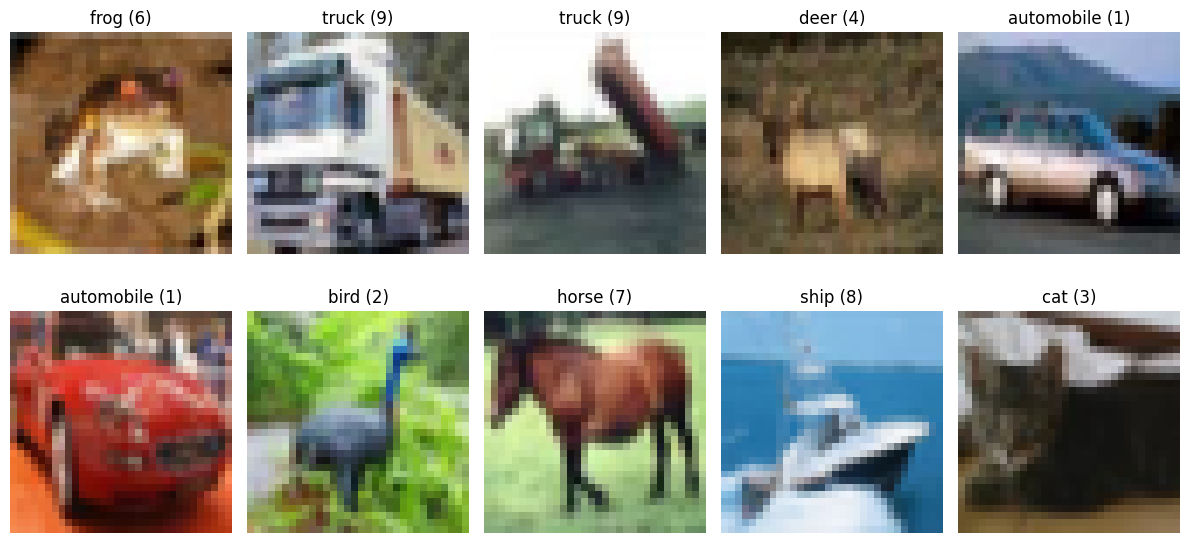

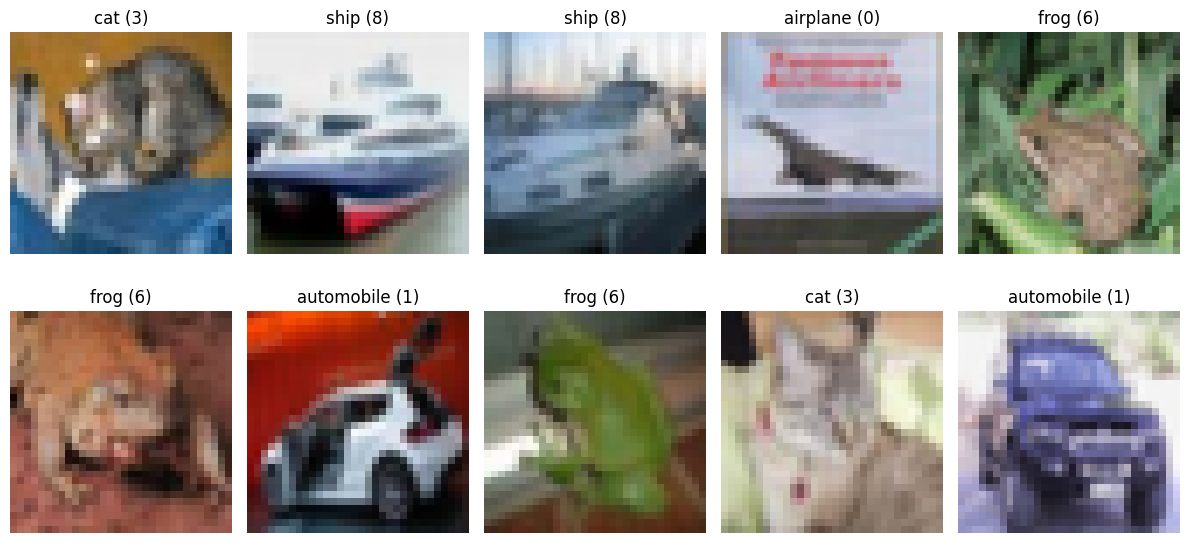

In [7]:
# Подгрузим данные для последующего обучения

from torchvision import datasets

train_dataset = datasets.CIFAR10('./data', train=True, download=True, transform=None)
test_dataset = datasets.CIFAR10('./data', train=False, download=True, transform=None)

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck']

def show_images(dataset, num_images=10):
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    axes = axes.ravel()
    
    for i in range(num_images):
        image, label = dataset[i]
        
        axes[i].imshow(image)
        axes[i].set_title(f'{classes[label]} ({label})')
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()


show_images(train_dataset)

show_images(test_dataset)

In [8]:
print("Размер обучающего датасета:", len(train_dataset))
print("Размер тестового датасета:", len(test_dataset))


Размер обучающего датасета: 50000
Размер тестового датасета: 10000


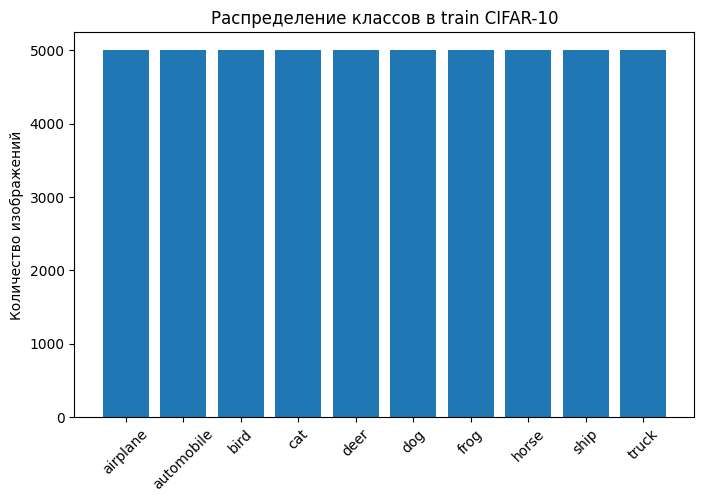

In [9]:
from collections import Counter

train_labels = [label for _, label in train_dataset]
class_counts = Counter(train_labels)

plt.figure(figsize=(8,5))
plt.bar(classes, [class_counts[i] for i in range(10)])
plt.title("Распределение классов в train CIFAR-10")
plt.xticks(rotation=45)
plt.ylabel("Количество изображений")
plt.show()


## Создание модели

In [10]:
from torchvision import datasets
import matplotlib.pyplot as plt
import numpy as np

train_dataset = datasets.CIFAR10('./data', train=True, download=True, transform=None)

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck']

# plt.imshow(train_dataset[0][0])
print(len(train_dataset))
print(train_dataset[1])

image_test = train_dataset[0][0]

print(np.array(image_test).shape)
print(32*32*3)

50000
(<PIL.Image.Image image mode=RGB size=32x32 at 0x1253425D0>, 9)
(32, 32, 3)
3072


In [11]:
from torch import nn

from torch.optim import Adam

class TestMLP(nn.Module):
    def __init__(self, num_input, num_output):
        super().__init__()
        self.linear_1 = nn.Linear(num_input, 32)
        self.relu = nn.ReLU()
        self.linear_2 = nn.Linear(32, 64)
        self.linear_3 = nn.Linear(64, num_output)
        self.softmax = nn.Softmax()
        
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.linear_1(x)

        x = self.relu(x)
        x = self.linear_2(x)
        x = self.relu(x)
        x = self.linear_3(x)
        x = self.softmax(x)
        
        return x



model = TestMLP(32*32*3, 10)

test_image = torch.randn(1,32*32*3)
print(test_image.shape)

print(model(test_image))


torch.Size([1, 3072])
tensor([[0.1075, 0.1328, 0.0822, 0.1090, 0.1110, 0.0892, 0.0752, 0.0927, 0.1008,
         0.0995]], grad_fn=<SoftmaxBackward0>)


/Users/andrey_kiseleq/Documents/vs_code/itmo/arc_ml/.venv/lib/python3.13/site-packages/torch/nn/modules/module.py:1773: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


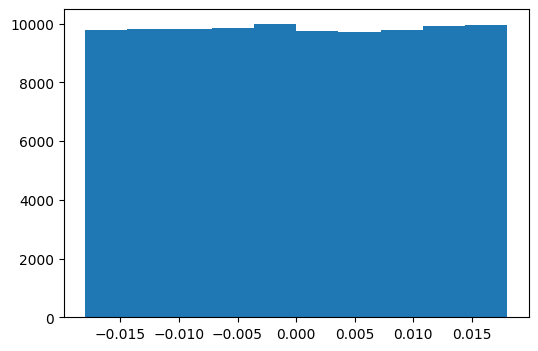

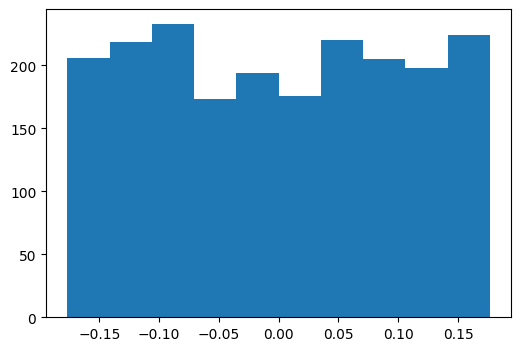

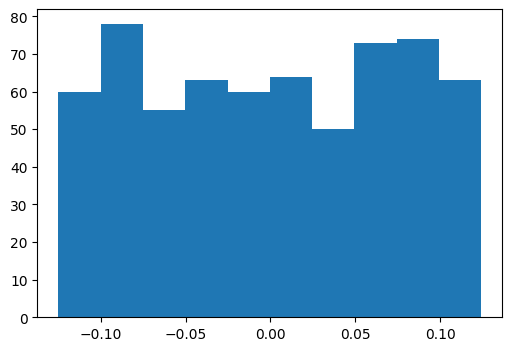

In [12]:
# можно посмотреть распределение весов по слоям

import matplotlib.pyplot as plt

for name, param in model.named_parameters():
    if "weight" in name:
        plt.figure(figsize=(6,4))
        plt.hist(param.detach().numpy().flatten())
        plt.show()


In [13]:
# Цикл обучения

from torchvision import datasets, transforms
from tqdm import tqdm

transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = datasets.CIFAR10('./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10('./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False)


model = TestMLP(32*32*3, 10)

criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001)

epochs = 5
train_losses = []

for epoch in range(epochs):
    running_loss = 0.0
    
    for images, labels in tqdm(train_loader):
        
        optimizer.zero_grad()
        outputs = model(images)
        
        loss = criterion(outputs, labels)
        train_losses.append(loss)
        loss.backward()
        
        optimizer.step()
        
    print(f'loss: {sum(train_losses)/ len(train_losses)}')
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {sum(train_losses)/ len(train_losses)}')


100%|██████████| 782/782 [00:01<00:00, 447.85it/s]


loss: 2.158717632293701
Epoch [1/5], Loss: 2.158717632293701


100%|██████████| 782/782 [00:01<00:00, 467.34it/s]


loss: 2.131235122680664
Epoch [2/5], Loss: 2.131235122680664


100%|██████████| 782/782 [00:01<00:00, 447.97it/s]


loss: 2.1165945529937744
Epoch [3/5], Loss: 2.1165945529937744


100%|██████████| 782/782 [00:01<00:00, 452.84it/s]


loss: 2.1066477298736572
Epoch [4/5], Loss: 2.1066477298736572


100%|██████████| 782/782 [00:01<00:00, 464.18it/s]

loss: 2.098769426345825
Epoch [5/5], Loss: 2.098769426345825


In [14]:

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy: {100 * correct / total}%')

Accuracy: 38.51%


# Инициализация весов нейросетей

При обучении нейронных сетей очень важно, **как заданы начальные значения весов**.  

Если выбрать их неправильно:
- 🛑 Сеть может **не учиться** (например, если все веса одинаковые → нет различий между нейронами)  
- 🐢 Обучение может быть **очень медленным** (слишком маленькие веса → сигналы затухают)  
- 💥 Может возникнуть эффект **взрыва градиентов** (слишком большие веса → активации и градиенты растут без контроля)  

---

## Основные стратегии инициализации

1. **Constant** — все веса одинаковые  
   ➡️ демонстрация того, что сеть перестаёт обучаться  

2. **Низкая дисперсия** (например, `Normal(0, 0.01)`)  
   ➡️ сеть учится очень медленно, сигналы почти исчезают  

3. **Высокая дисперсия** (например, `Normal(0, 1)`)  
   ➡️ сеть нестабильна, градиенты взрываются  

4. **Xavier (Glorot)**  
   - подбирает дисперсию весов так, чтобы сигналы сохраняли масштаб при прохождении через слои  
   - хорошо работает для `tanh` и `sigmoid`  

5. **He (Kaiming)**  
   - модификация Xavier под `ReLU`  
   - учитывает, что часть нейронов обнуляется  
   - формула дисперсии:  



In [13]:

import torch.nn.init as init

class NetworkMLP(nn.Module):
    def __init__(self, num_inputs, num_hidden, num_outputs, act_fn=nn.Sigmoid()):
        super().__init__()
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = act_fn
        self.linear2 = nn.Linear(num_hidden, num_outputs)

    def forward(self, x):
        z1 = self.linear1(x)
        a1 = self.act_fn(z1)
        z2 = self.linear2(a1)
        return z1, a1, z2

In [14]:
def initialize_weights(model, mode="xavier"):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            if mode == "constant":
                init.constant_(m.weight, 0.01)
            elif mode == "low_var":
                init.normal_(m.weight, mean=0.0, std=0.01)
            elif mode == "high_var":
                init.normal_(m.weight, mean=0.0, std=1.0)
            elif mode == "xavier":
                init.xavier_uniform_(m.weight)
            elif mode == "he":
                init.kaiming_uniform_(m.weight, nonlinearity="relu")
            if m.bias is not None:
                init.constant_(m.bias, 0)


def plot_layer_distributions(model, title):
    """Распределения весов по слоям"""
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    layers = [model.linear1, model.linear2]

    for i, layer in enumerate(layers):
        weights = layer.weight.detach().cpu().numpy().flatten()
        axs[i].hist(weights, bins=50)
        axs[i].set_title(f"{title} | Layer {i+1}\nmean={weights.mean():.4f}, std={weights.std():.4f}")

    plt.tight_layout()
    plt.show()

def plot_activation_distributions(model, mode):
    """Распределения активаций"""
    x = torch.randn(128, 3*32*32)
    with torch.no_grad():
        z1, a1, z2 = model(x)

    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    for i, (data, name) in enumerate([(z1, "z1 pre-activation"),
                                      (a1, "a1 post-activation"),
                                      (z2, "z2 output")]):
        arr = data.cpu().numpy().flatten()
        axs[i].hist(arr, bins=50)
        axs[i].set_title(f"{mode} | {name}\nmean={arr.mean():.4f}, std={arr.std():.4f}")
    plt.tight_layout()
    plt.show()


=== CONSTANT INITIALIZATION ===


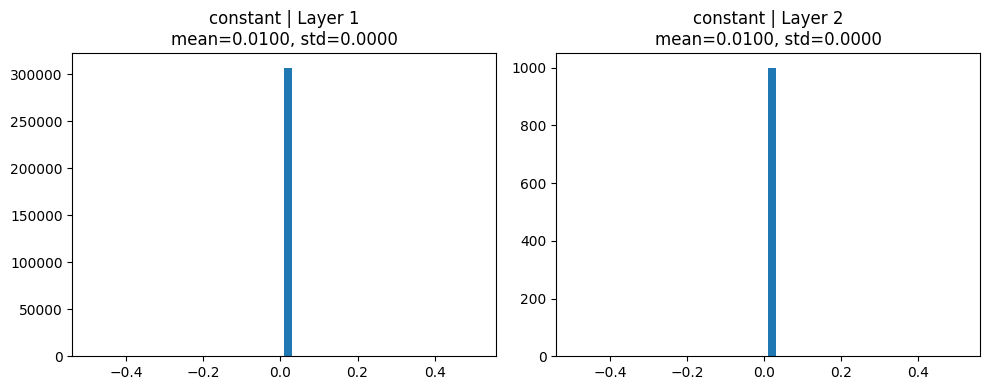

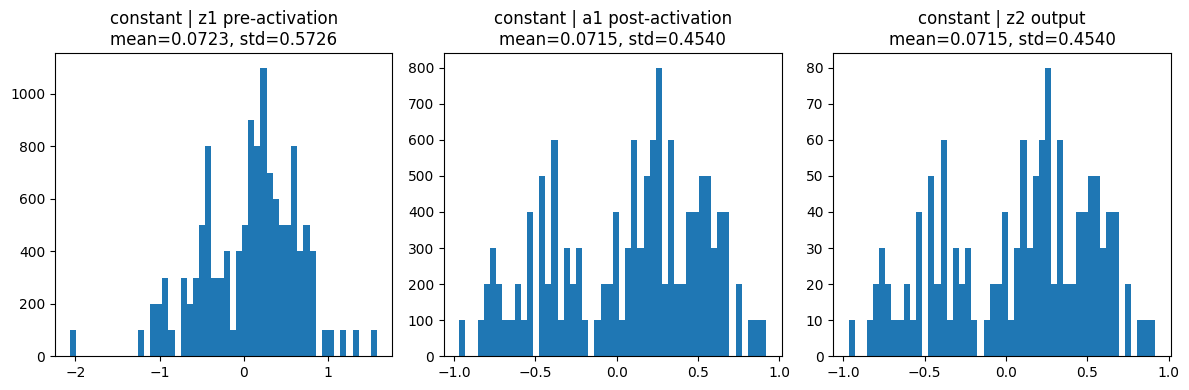


=== LOW_VAR INITIALIZATION ===


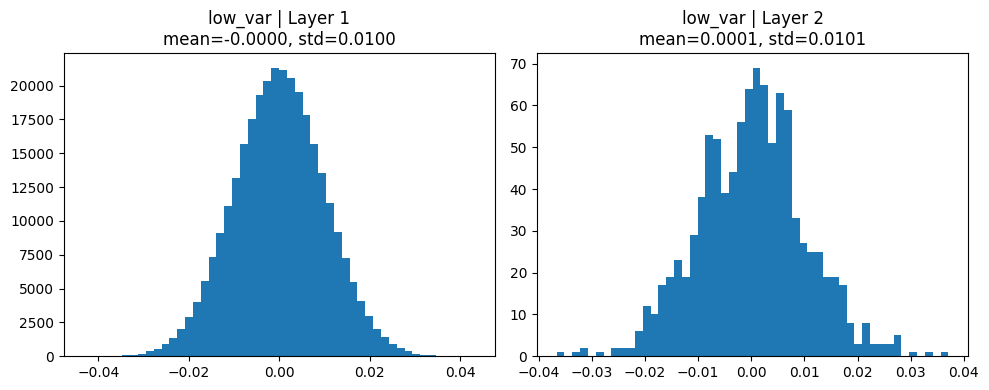

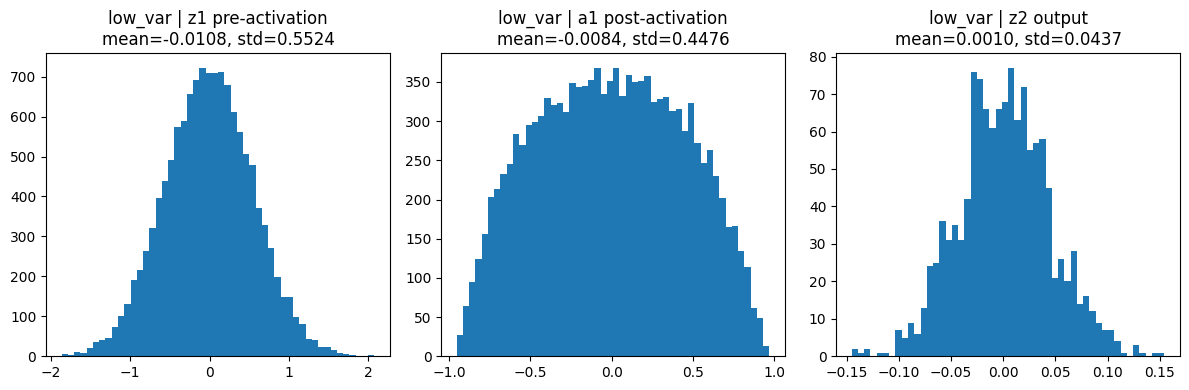


=== HIGH_VAR INITIALIZATION ===


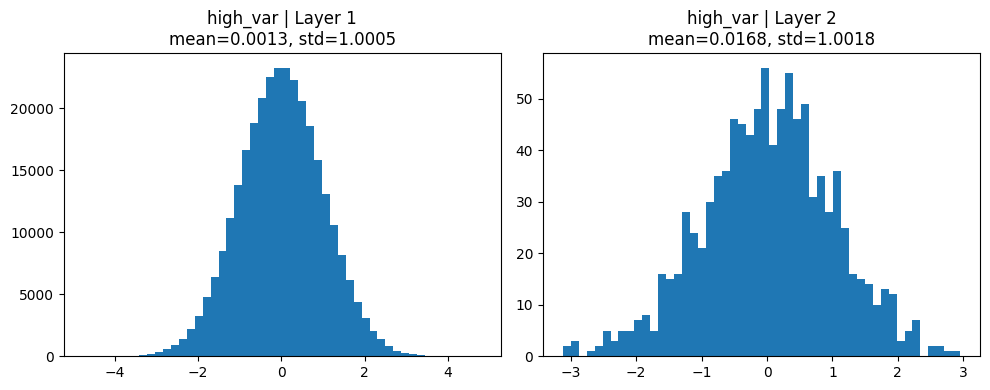

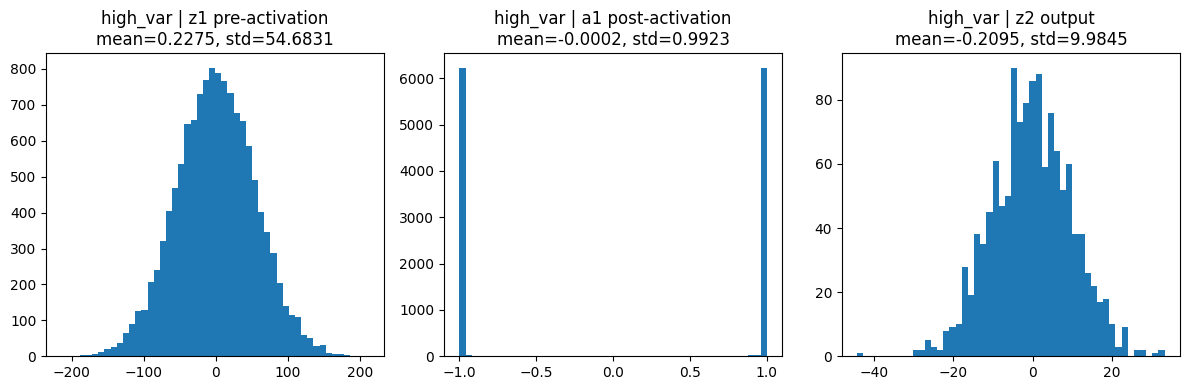


=== XAVIER INITIALIZATION ===


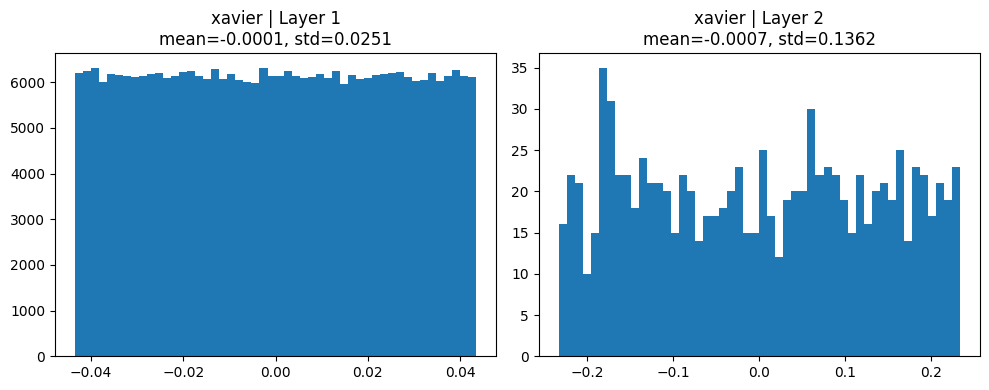

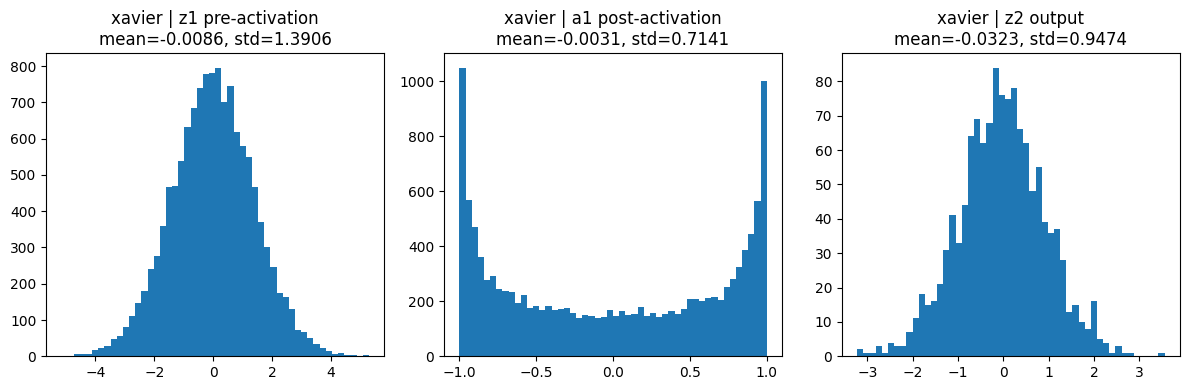


=== HE INITIALIZATION ===


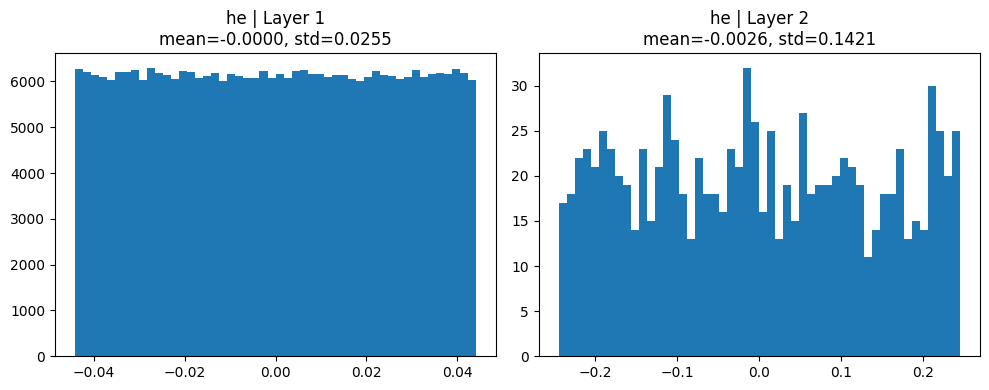

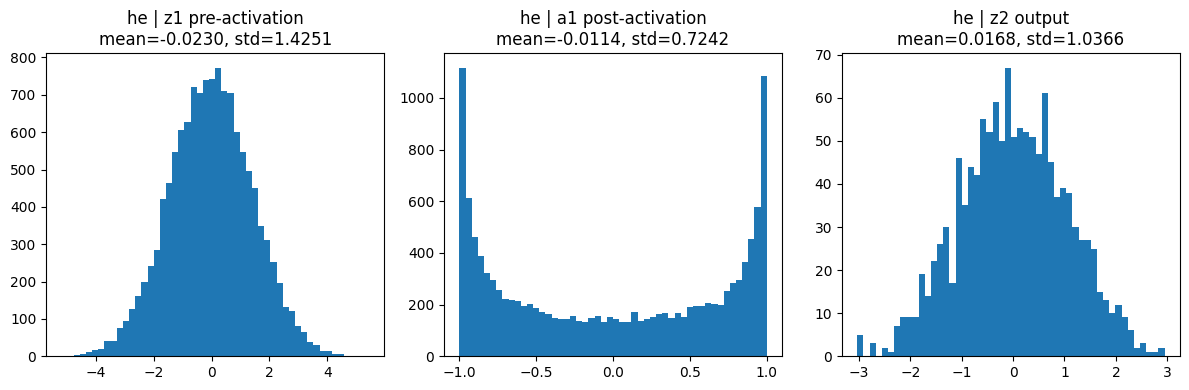

In [15]:
modes = ["constant", "low_var", "high_var", "xavier", "he"]

for mode in modes:
    print(f"\n=== {mode.upper()} INITIALIZATION ===")
    model = NetworkMLP(3*32*32, 100, 10, act_fn=nn.Tanh())
    initialize_weights(model, mode=mode)

    # Веса по слоям
    plot_layer_distributions(model, mode)

    # Активации
    plot_activation_distributions(model, mode)

# Сверточная нейронная сеть


In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10('./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10('./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck']

In [18]:
import torch.nn.functional as F


class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)   # (32, 32, 32)
        self.pool = nn.MaxPool2d(2, 2)                           # (32, 16, 16)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1) # (64, 16, 16)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        # первый слой
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        
        # второй слой
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)

        x = x.view(x.size(0), -1)  # flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
model = ConvNet()

test_tensor = torch.randn(1, 3, 32 ,32)

model(test_tensor)

tensor([[ 0.0568,  0.1218, -0.0317, -0.1881, -0.2571, -0.1111,  0.0419, -0.0732,
         -0.0493, -0.0686]], grad_fn=<AddmmBackward0>)

In [19]:
# Цикл обучения
from torchvision import datasets, transforms
from tqdm import tqdm

transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = datasets.CIFAR10('./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10('./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
# test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False)


model = ConvNet()

criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001)

epochs = 5
train_losses = []

for epoch in range(epochs):
    running_loss = 0.0
    
    for images, labels in tqdm(train_loader):
        
        optimizer.zero_grad()
        outputs = model(images)
        
        loss = criterion(outputs, labels)
        train_losses.append(loss)
        loss.backward()
        
        optimizer.step()
        
    print(f'loss: {sum(train_losses)/ len(train_losses)}')
        # считаем лосс и обновляем градиенты

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {sum(train_losses)/ len(train_losses)}')


100%|██████████| 782/782 [00:17<00:00, 43.77it/s]


loss: 1.4724268913269043
Epoch [1/5], Loss: 1.4724268913269043


100%|██████████| 782/782 [00:17<00:00, 43.76it/s]


loss: 1.3018434047698975
Epoch [2/5], Loss: 1.3018434047698975


100%|██████████| 782/782 [00:17<00:00, 43.57it/s]


loss: 1.1951314210891724
Epoch [3/5], Loss: 1.1951314210891724


100%|██████████| 782/782 [00:17<00:00, 43.47it/s]


loss: 1.1155093908309937
Epoch [4/5], Loss: 1.1155093908309937


100%|██████████| 782/782 [00:18<00:00, 42.98it/s]

loss: 1.053098440170288
Epoch [5/5], Loss: 1.053098440170288


In [20]:

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy: {100 * correct / total}%')

Accuracy: 51.74%


В PyTorch **нет отдельной функции** с названием `global_avg_pool2d`.  

Вместо этого используют **адаптивное усреднение**, которое позволяет задать любой размер выходного тензора:  

- Функция: `torch.nn.functional.adaptive_avg_pool2d`  
- Слой: `nn.AdaptiveAvgPool2d`  

Если задать `output_size=1`, то результат соответствует **Global Average Pooling** по всем пространственным координатам.


In [32]:
# Модель с global avg pooling

import torch
import torch.nn as nn
import torch.nn.functional as F

class ConvNetGAP(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)   # (32, 32, 32)
        self.pool = nn.MaxPool2d(2, 2)                           # (32, 16, 16)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1) # (64, 16, 16)
        self.relu = nn.ReLU()

        self.fc = nn.Linear(64, 10)

    def forward(self, x):
        # первый слой
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)

        # второй слой
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)   # (batch, 64, 8, 8)

        # Global Average Pooling 
        x = F.adaptive_avg_pool2d(x, 1)  # (batch, 64, 1, 1)
        x = x.view(x.size(0), -1)        # (batch, 64)

        # классификация
        x = self.fc(x)
        return x

# Проверка
model = ConvNetGAP()
test_tensor = torch.randn(1, 3, 32, 32)
out = model(test_tensor)

print("Выход модели:", out.shape)  # (1, 10)


Выход модели: torch.Size([1, 10])


Задача 1

создайте сеть ровно с тремя сверточными слоями
Первый слой: 3 канала → 16 каналов
Второй слой: 16 → 32
Третий слой: 32 → 64

В конце использовать Global Average Pooling.

Задача 2

создайте CNN где количество фильтров сначала растет, потом уменьшается
Пример: 3 → 32 → 64 → 128 → 64 → 32 → 10

Условие: использовать одинаковые свертки в растущей и убывающей частях